## Histograms
- todo: ehhez kell valamelyik basic memoriaval meres

In [1]:
import visu_common
import os
import measurement
import matplotlib.pyplot as plt
import histogram

mems = visu_common.get_mems('pilot')
for mem in mems:
    dir_prefix = os.path.join('pilot', mem)

    directions = ['s', 'r']
    for direction in directions:
        clocks = visu_common.get_clocks_in_folder(dir_prefix, prefix=f'meas_{direction}_')
        for m7, m4 in clocks:
            measurement_folder = os.path.join(dir_prefix, f'meas_{direction}_{m7}_{m4}')
            sizes = [16380] #visu_common.get_sizes(measurement_folder)
            raw = measurement.read_meas_from_files(sizes, measurement_folder)

            # for raw_per_size, size in raw, sizes:
            plt.figure()
            title = f'data size:{sizes[0]}, mem: {mem},\n' \
                    f'M7: {m7}, M4: {m4}, direction:{direction}'
            histogram.histogram_intervals(raw, title)
plt.show()

## Adatmeret hatasa

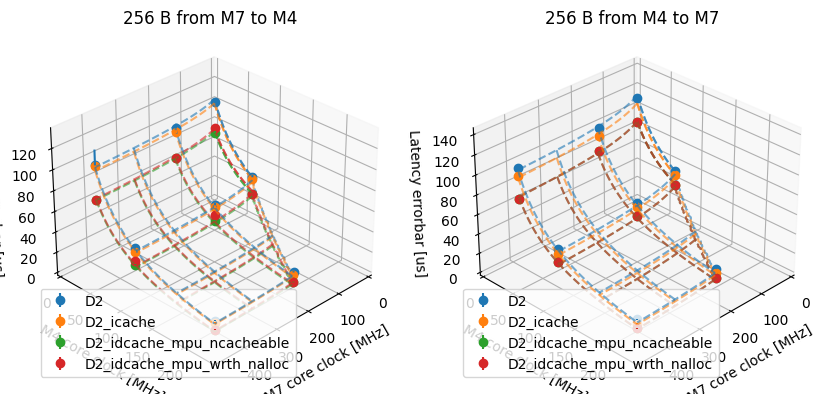

In [15]:
import matplotlib.pyplot as plt
import os
import visu_3d
import visu_common


size = 256
mems = visu_common.get_mems('.', r'D2.*')
meas_type = 'latency'
filename = 'size_3d.pdf'

fig = plt.figure(figsize=(10, 15))

for i, direction in enumerate(['s', 'r']):
    ax = fig.add_subplot(121 + i, projection='3d')
    visu_3d.full3d_foreach(size, mems, direction, ax, meas_type=meas_type,
                            if_cut=True)

out = os.path.join('figures', filename)
plt.savefig(out, bbox_inches='tight')
# show graph
plt.show()